In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=0.5e-5):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K] 
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon)) 
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()  ### 
            
        return y_hat

#data split at test dat being 20%
def tt_split(X, y, test_size=0.2):

    i = int((1 - test_size) * X.shape[0]) 
    o = np.random.permutation(X.shape[0])
    
    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return X_train, X_test, y_train, y_test

def OLS(Y, Y_hat):
    N = Y.shape[0]
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
data = pd.read_csv("raw_house_data.csv")


In [ ]:
#Understanding the data


In [ ]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [ ]:
data.tail()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4,4,4317,None,"Compactor, Dishwasher, Double Sink, Island, Ap...",3,"Carpet, Mexican Tile",None


In [ ]:
data.shape

(5000, 16)

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [ ]:
data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [ ]:
data.columns


Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [ ]:
data.nunique()

MLS                 5000
sold_price          1092
zipcode               56
longitude           4762
latitude            4821
lot_acres            645
taxes               4719
year_built           112
bedrooms              15
bathrooms             20
sqrt_ft             2362
garage                22
kitchen_features    1872
fireplaces            11
floor_covering       311
HOA                  381
dtype: int64

In [ ]:
data['bedrooms'].unique()

array([13,  2,  7,  4,  3,  9,  6,  5,  1, 19,  8, 10, 18, 11, 36])

In [ ]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",None


In [ ]:
## Replacing unwanted value using for loop
data['sqrt_ft']=data['sqrt_ft'].str.replace('None' , '0', regex=True)
data['HOA']=data['HOA'].str.replace ('None' , '0', regex=True)
data['HOA']=data['HOA'].str.replace('.' , '' , regex=True)
data['garage']=data['garage'].str.replace('None' , '0' , regex=True)
data['kitchen_features']=data['kitchen_features'].str.replace('.' , '' , regex=True)
data['floor_covering']=data['floor_covering'].str.replace('.' , '' , regex=True)



In [ ]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [ ]:
## Create two columns containing the number of kitchen features and flor coverings by counting "," values +1 to include the first feature
data['kitchen_feature_count'] = data['kitchen_features'].str.count(",") +1
data['floor_covering_count'] = data['floor_covering'].str.count(",") +1

In [ ]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,kitchen_feature_count,floor_covering_count
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,2,2
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,3,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,4,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,9,2
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,10,2
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,6,1
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,9,2


In [ ]:
#converting columns in to numric values 
data['sqrt_ft'] = pd.to_numeric(data['sqrt_ft'])
data['garage'] = pd.to_numeric(data['garage'])
data['taxes'] = pd.to_numeric(data['taxes'])
data['lot_acres'] = pd.to_numeric(data['lot_acres'])
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])

In [ ]:
#Coverting as float values 
data['latitude']=data['latitude'].astype(float)
data['longitude']=data['longitude'].astype(float)






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MLS                    5000 non-null   int64  
 1   sold_price             5000 non-null   float64
 2   zipcode                5000 non-null   int64  
 3   longitude              5000 non-null   float64
 4   latitude               5000 non-null   float64
 5   lot_acres              4990 non-null   float64
 6   taxes                  5000 non-null   float64
 7   year_built             5000 non-null   int64  
 8   bedrooms               5000 non-null   int64  
 9   bathrooms              5000 non-null   object 
 10  sqrt_ft                5000 non-null   float64
 11  garage                 5000 non-null   float64
 12  kitchen_features       5000 non-null   object 
 13  fireplaces             5000 non-null   object 
 14  floor_covering         5000 non-null   object 
 15  HOA 

In [ ]:
data_cut = data.drop(['lot_acres' ,'HOA','zipcode'] , axis=1)

In [ ]:
data_cut.shape

(5000, 15)

In [ ]:
data_cut.isnull().sum()

MLS                      0
sold_price               0
longitude                0
latitude                 0
taxes                    0
year_built               0
bedrooms                 0
bathrooms                0
sqrt_ft                  0
garage                   0
kitchen_features         0
fireplaces               0
floor_covering           0
kitchen_feature_count    0
floor_covering_count     0
dtype: int64

In [ ]:
data_cut

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count
0,21530491,5300000.0,-110.378200,31.356362,5272.00,1941,13,10,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",4,2
1,21529082,4200000.0,-111.045371,31.594213,10422.36,1997,2,2,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",2,2
2,3054672,4200000.0,-111.040707,31.594844,10482.00,1997,2,3,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",3,2
3,21919321,4500000.0,-111.035925,31.645878,8418.58,1930,7,5,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",4,3
4,21306357,3411450.0,-110.813768,32.285162,15393.00,1995,4,6,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,-110.661829,31.907917,2017.00,2005,5,3,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2
4996,21908591,550000.0,-110.858556,32.316373,4822.01,1990,4,3,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",10,2
4997,21832452,475000.0,-110.755428,32.964708,1000.00,1969,3,2,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,6,1
4998,21900515,550000.0,-111.055528,32.296871,5822.93,2009,4,4,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2


In [ ]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MLS                    5000 non-null   int64  
 1   sold_price             5000 non-null   float64
 2   longitude              5000 non-null   float64
 3   latitude               5000 non-null   float64
 4   taxes                  5000 non-null   float64
 5   year_built             5000 non-null   int64  
 6   bedrooms               5000 non-null   int64  
 7   bathrooms              5000 non-null   object 
 8   sqrt_ft                5000 non-null   float64
 9   garage                 5000 non-null   float64
 10  kitchen_features       5000 non-null   object 
 11  fireplaces             5000 non-null   object 
 12  floor_covering         5000 non-null   object 
 13  kitchen_feature_count  5000 non-null   int64  
 14  floor_covering_count   5000 non-null   int64  
dtypes: f

In [ ]:
#Analysis 

In [ ]:
corelation = data_cut.corr()

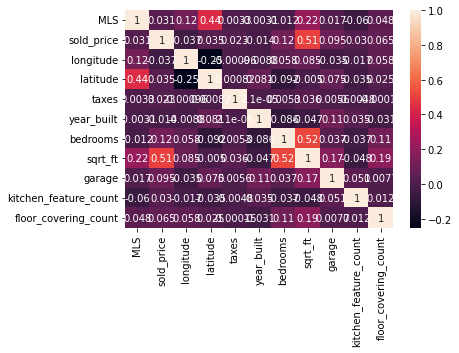

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns , annot=True)

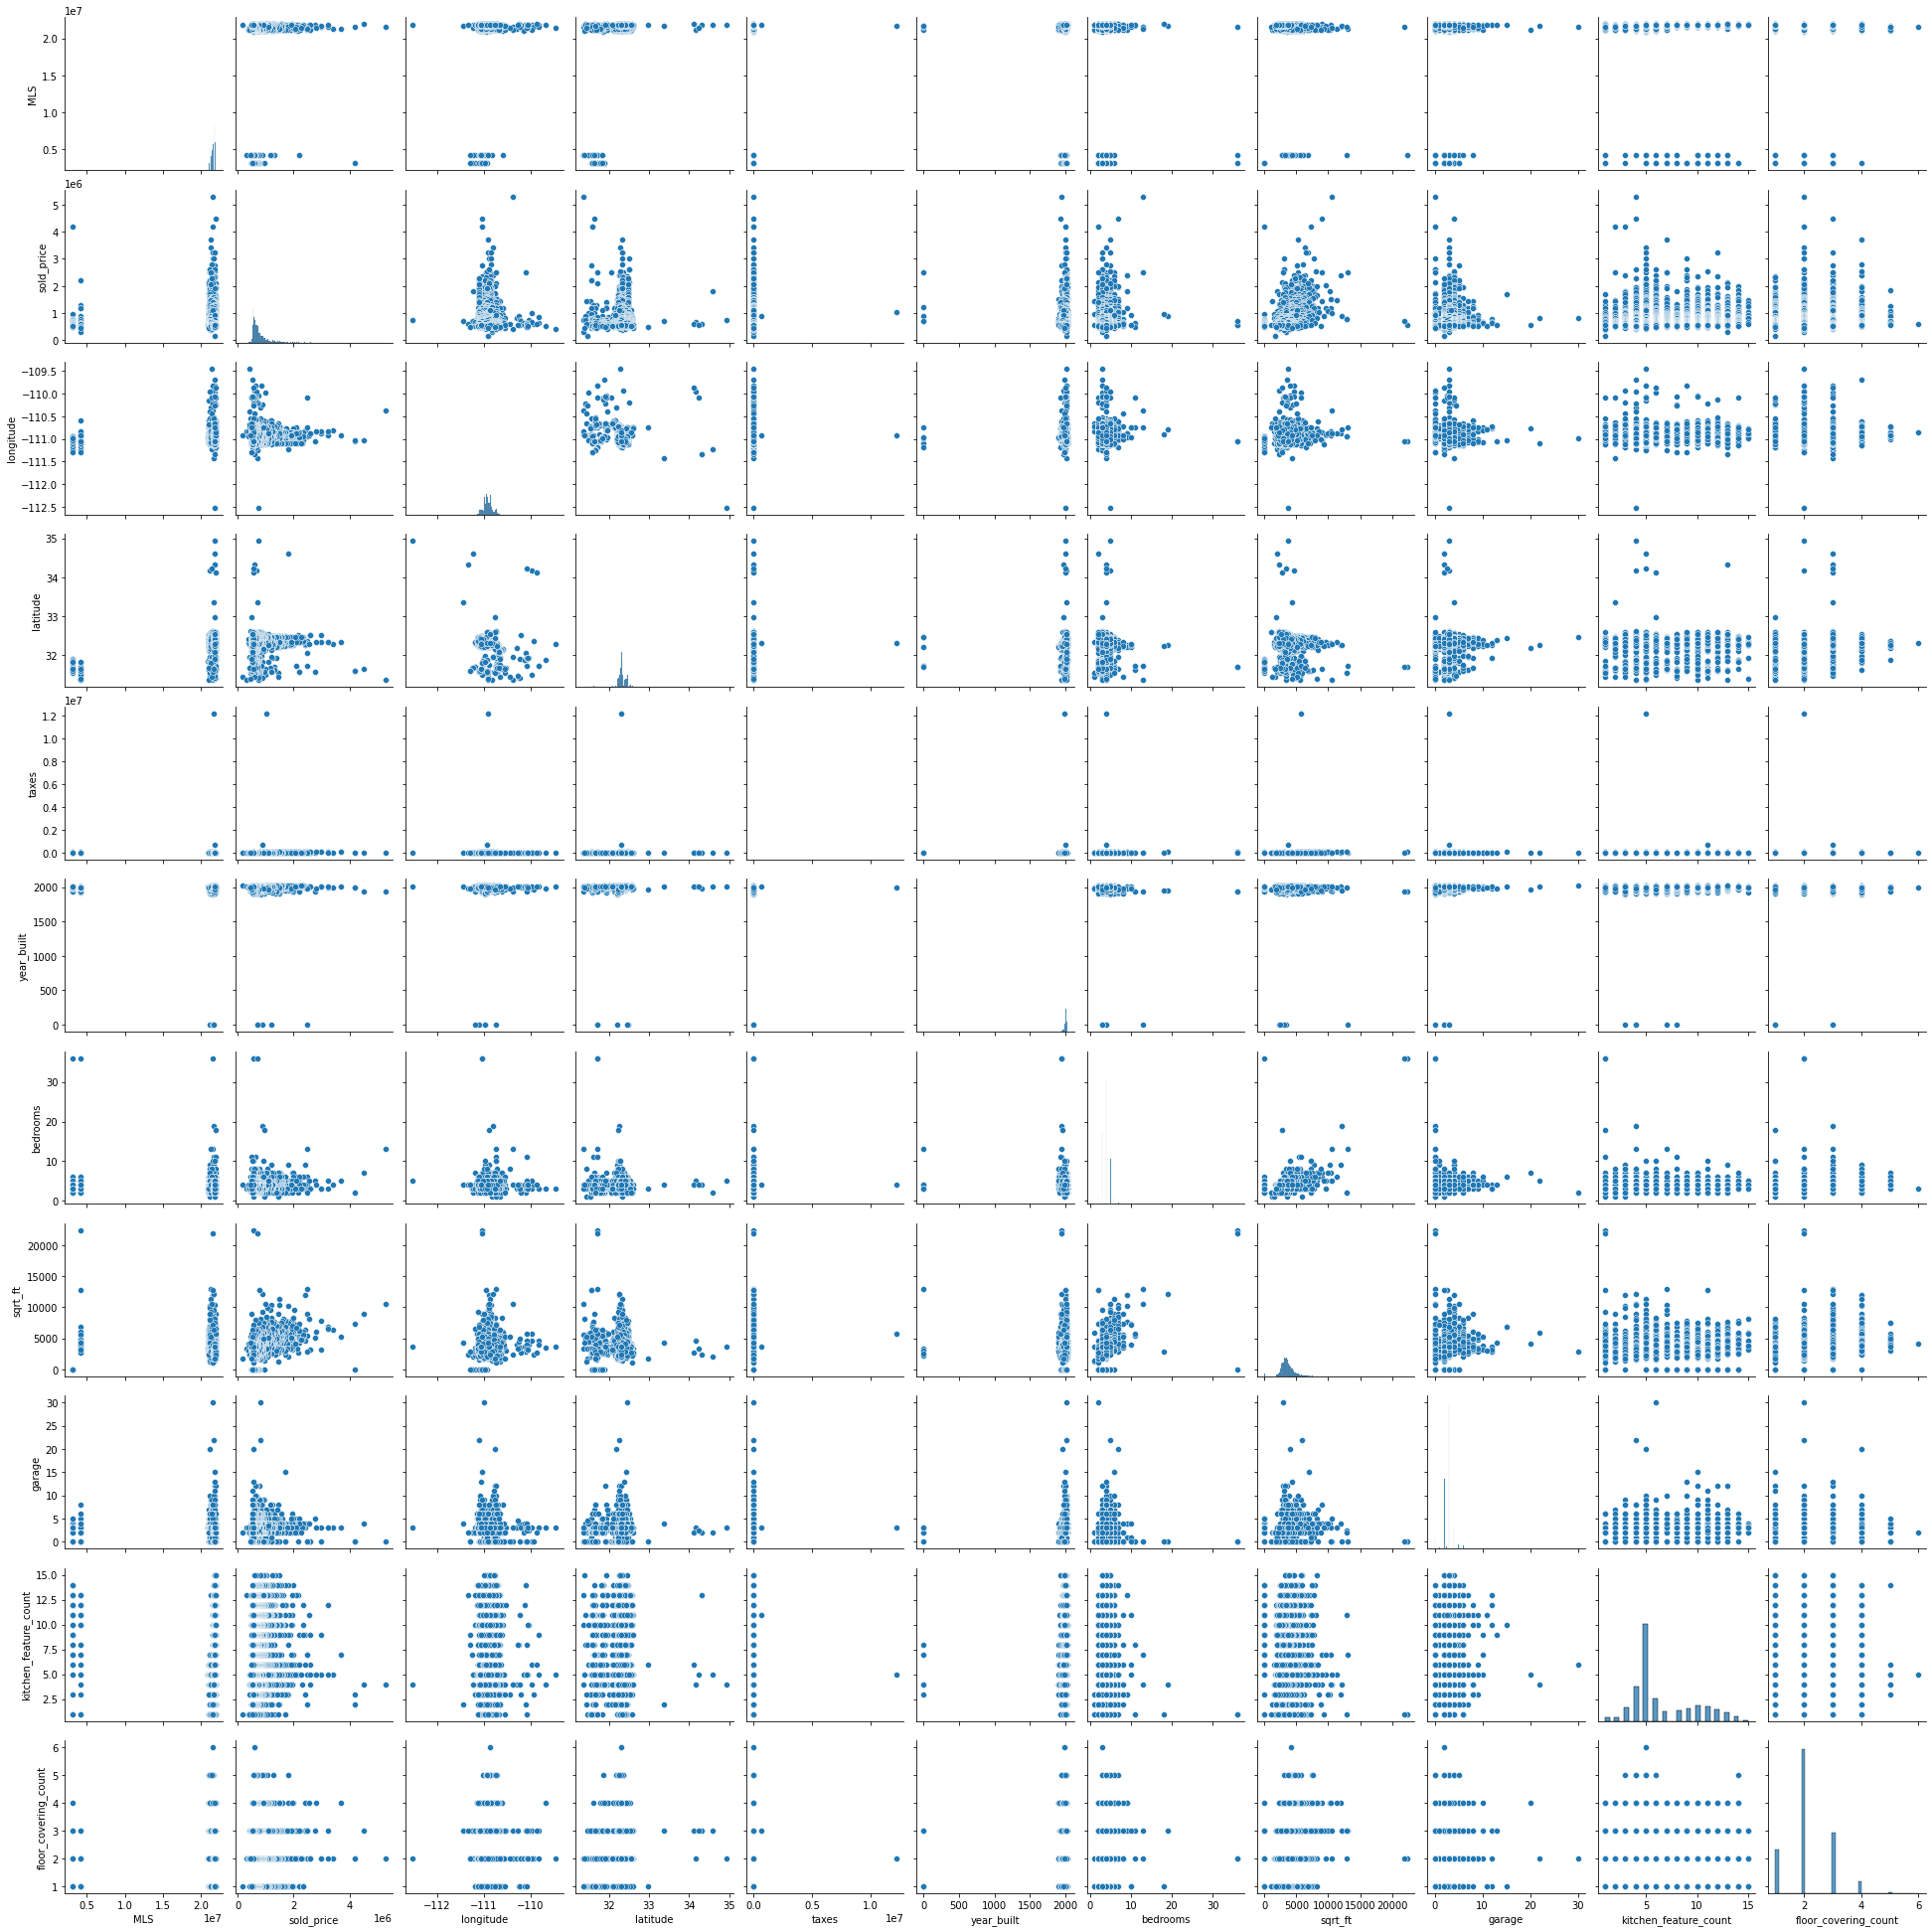

In [ ]:
sns.pairplot(data_cut)

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


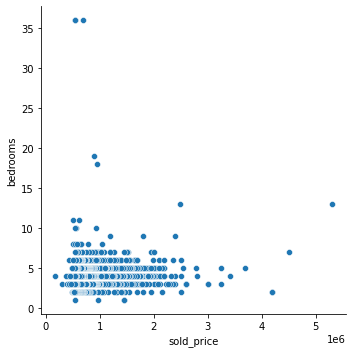

In [ ]:
sns.relplot(x='sold_price', y='bedrooms', data=data_cut )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


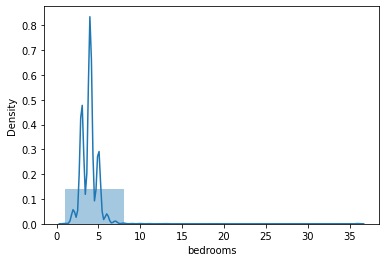

In [ ]:
sns.distplot(data_cut['bedrooms'], bins=5)

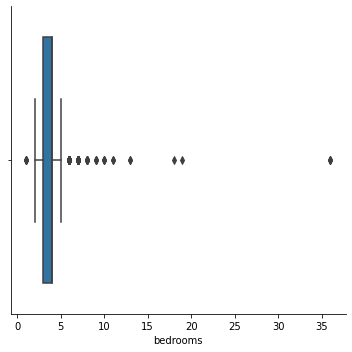

In [ ]:
sns.catplot(x='bedrooms',kind='box', data=data_cut)

In [ ]:
data_cut

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count
0,21530491,5300000.0,-110.378200,31.356362,5272.00,1941,13,10,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",4,2
1,21529082,4200000.0,-111.045371,31.594213,10422.36,1997,2,2,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",2,2
2,3054672,4200000.0,-111.040707,31.594844,10482.00,1997,2,3,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",3,2
3,21919321,4500000.0,-111.035925,31.645878,8418.58,1930,7,5,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",4,3
4,21306357,3411450.0,-110.813768,32.285162,15393.00,1995,4,6,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,-110.661829,31.907917,2017.00,2005,5,3,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2
4996,21908591,550000.0,-110.858556,32.316373,4822.01,1990,4,3,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",10,2
4997,21832452,475000.0,-110.755428,32.964708,1000.00,1969,3,2,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,6,1
4998,21900515,550000.0,-111.055528,32.296871,5822.93,2009,4,4,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2


In [ ]:
#creating a columns with 2 columns divided eachother
data_cut['pricensqft']=data_cut['sold_price']/data_cut['sqrt_ft']

In [ ]:
#Converting it as a intiger
data_cut['sold_price']/data_cut['sqrt_ft'].astype(int)

0       504.761905
1       575.342466
2              inf
3       498.946668
4       533.372420
           ...    
4995    137.461816
4996    237.273512
4997    268.058691
4998    147.690655
4999    104.239055
Length: 5000, dtype: float64

In [ ]:
#Dropping any values to 0 
data_cut=data_cut[data_cut.sqrt_ft > 0]

In [ ]:
data_cut

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft
0,21530491,5300000.0,-110.378200,31.356362,5272.00,1941,13,10,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",4,2,504.761905
1,21529082,4200000.0,-111.045371,31.594213,10422.36,1997,2,2,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",2,2,575.342466
3,21919321,4500000.0,-111.035925,31.645878,8418.58,1930,7,5,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",4,3,498.946668
4,21306357,3411450.0,-110.813768,32.285162,15393.00,1995,4,6,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",5,2,533.372420
5,21528016,3250000.0,-110.910593,32.339090,27802.84,1999,3,4,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",5,3,475.007308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,-110.661829,31.907917,2017.00,2005,5,3,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2,137.461816
4996,21908591,550000.0,-110.858556,32.316373,4822.01,1990,4,3,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",10,2,237.273512
4997,21832452,475000.0,-110.755428,32.964708,1000.00,1969,3,2,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,6,1,268.058691
4998,21900515,550000.0,-111.055528,32.296871,5822.93,2009,4,4,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",9,2,147.690655


In [ ]:
#converting it as a intiger
data_cut['pricensqft'].astype(int)

0       504
1       575
3       498
4       533
5       475
       ... 
4995    137
4996    237
4997    268
4998    147
4999    104
Name: pricensqft, Length: 4944, dtype: int64

In [ ]:
###Creating catogeries for priceRange
cat = []
for i in data_cut['pricensqft']:
  if i < 175:
    cat.append(1)
  elif i >= 175 and i < 202:
    cat.append(2)
  elif i >= 202 and i < 235:
    cat.append(3)
 
  elif i >= 235:
    cat.append(4)  
  else:
    cat.append(i)

data_cut['priceRange'] = cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
lan = []
for i in data_cut["pricensqft"]:
    lan.append(i)

In [ ]:
lan = []
for i in data_cut['pricensqft']:
  if i < 175:
    cat.append(1)
  elif i >= 175 and i < 202:
    cat.append(2)
  elif i >= 202 and i < 235:
    cat.append(3)
  elif i >= 235:
    cat.append(4)  
  else:
    cat.append(i)

In [ ]:
########data_cut[''].value_counts().plot(kind='bar')

In [ ]:
#converting data from assending to desending 
data_cut = data_cut.sort_values('taxes', ascending=False)

In [ ]:
for i in data_cut['taxes'].unique():
  print(i)

12215075.0
668059.0
32442.22
31277.1
31275.0
30072.26
29669.0
27802.84
27781.84
27310.13
26856.69
26642.7
26641.26
26110.0
25550.03
25315.81
25113.45
25094.39
24353.0
24316.0
24040.26
23880.63
23550.23
23378.3
23203.0
23156.58
22677.81
22655.99
22320.0
22231.69
22070.48
21971.0
21910.0
21795.32
21646.0
21602.0
21533.73
21370.94
21310.94
21239.25
21218.1
21135.51
21083.04
21063.0
21011.08
20960.92
20761.44
20744.74
20718.0
20530.88
20477.3
20385.0
20352.72
20300.0
20224.29
20206.0
20084.0
19565.2
19537.0
19488.82
19421.93
19416.38
19349.43
19337.24
19156.0
19119.65
19110.45
19060.81
19038.42
18968.92
18936.11
18678.46
18658.0
18610.0
18578.95
18553.91
18509.3
18373.0
18322.6
18292.0
18141.28
18049.75
18044.0
17921.0
17898.0
17874.58
17777.6
17730.25
17693.15
17691.0
17567.18
17435.04
17309.98
17213.59
17180.46
17126.71
17117.92
17103.79
17095.0
17077.5
17040.17
16845.2
16832.76
16796.89
16721.99
16714.0
16702.0
16658.0
16643.1
16559.0
16545.72
16519.0
16469.0
16439.73
16354.0
16352.08
1

In [ ]:
# creating catogries for comercial and private data between 800
data_cut['commercial_propertys_and_resideltial'] = data_cut['taxes'].apply(lambda x: 1 if x>8000 else 0)
#data_cut['residential_propertsy'] = data_cut['taxes'].apply(lambda x: 1 if x<8001 else 0)

In [ ]:
data_cut.head()

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft,priceRange,commercial_propertys_and_resideltial
715,21700546,1040000.0,-110.909653,32.301099,12215075.00,1987,4,4,5729.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Ceramic Tile, Natural Stone",5,2,181.532554,2,1
1135,21829815,885000.0,-110.924210,32.309002,668059.00,2003,4,3,3650.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Natural Stone, Other: Travertine",11,3,242.465753,4,1
54,21521984,2037500.0,-110.918390,32.343176,32442.22,2003,3,5,9630.0,4.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",5,2,211.578401,3,1
1588,21428822,799000.0,-110.808671,32.264502,31277.10,1955,2,2,1774.0,0.0,"Refrigerator, Oven",1,"Carpet, Vinyl, Other",2,3,450.394589,4,1
27,21810373,2350000.0,-111.039845,32.451596,31275.00,2007,3,5,5391.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",6,Concrete,10,1,435.911705,4,1


In [ ]:
data_cut.tail()

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft,priceRange,commercial_propertys_and_resideltial
725,21730800,1069000.0,-110.939051,32.243662,0.0,2018,3,3,3346.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",1,"Carpet, Natural Stone",9,2,319.485953,4,0
723,21624132,1048842.0,-110.938291,32.242845,0.0,2016,2,3,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1,"Carpet, Natural Stone",3,2,313.461447,4,0
1682,21811228,750000.0,-110.961048,32.409860,0.0,2018,4,3,3115.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",9,2,240.770465,4,0
4937,21708192,510000.0,-110.927929,32.231170,0.0,1949,4,3,2779.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Oven",1,"Carpet, Concrete",4,2,183.519252,2,0
1427,21522262,809310.0,-110.976076,32.459110,0.0,2015,3,4,3360.0,3.0,"Dishwasher, Garbage Disposal, Microwave, Oven",0,"Carpet, Ceramic Tile",4,2,240.866071,4,0


In [ ]:
df = data_cut
df = data_cut[data_cut.taxes > 7900]
df = df[df.taxes < 8100]
df['ava'] = df['sold_price'].mean()
df

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft,priceRange,commercial_propertys_and_resideltial,ava
783,21131918,950000.0,-110.833401,32.316853,8098.00,2008,4,4,4547.0,4.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile, Wood",5,3,208.928964,3,1,779608.705128
1125,21713696,862500.0,-110.852550,32.324652,8096.54,2003,4,3,3388.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2,"Carpet, Concrete, Natural Stone",7,3,254.574970,4,1,779608.705128
2251,21508311,725000.0,-110.976939,32.434775,8092.00,2007,4,4,3829.0,5.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",5,2,189.344476,2,1,779608.705128
1568,21527750,773000.0,-110.952628,32.456304,8091.68,2004,3,3,3330.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Ceramic Tile",5,2,232.132132,3,1,779608.705128
1206,21720617,865000.0,-110.836180,32.317611,8085.32,2007,4,4,3541.0,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",2,"Carpet, Natural Stone",9,2,244.281276,4,1,779608.705128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,21417393,685000.0,-110.861452,32.276881,7914.90,2006,4,4,3651.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Ceramic Tile",5,2,187.619830,2,0,779608.705128
958,21711238,905000.0,-110.915515,32.288808,7906.90,1998,4,4,3389.0,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",5,Mexican Tile,8,1,267.040425,4,0,779608.705128
2425,21618125,680679.0,-110.987694,32.403837,7905.20,2001,4,3,3350.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",5,2,203.187761,3,0,779608.705128
965,21901558,895000.0,-111.093793,32.300928,7904.43,2000,5,5,4518.0,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",3,Mexican Tile,10,1,198.096503,2,0,779608.705128


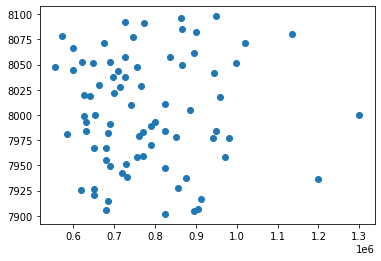

In [ ]:
plt.figure()
plt.scatter(df['sold_price'], df['taxes'])

In [ ]:
data_cut

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft,priceRange,commercial_propertys_and_resideltial
715,21700546,1040000.0,-110.909653,32.301099,12215075.00,1987,4,4,5729.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Ceramic Tile, Natural Stone",5,2,181.532554,2,1
1135,21829815,885000.0,-110.924210,32.309002,668059.00,2003,4,3,3650.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Natural Stone, Other: Travertine",11,3,242.465753,4,1
54,21521984,2037500.0,-110.918390,32.343176,32442.22,2003,3,5,9630.0,4.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",5,2,211.578401,3,1
1588,21428822,799000.0,-110.808671,32.264502,31277.10,1955,2,2,1774.0,0.0,"Refrigerator, Oven",1,"Carpet, Vinyl, Other",2,3,450.394589,4,1
27,21810373,2350000.0,-111.039845,32.451596,31275.00,2007,3,5,5391.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",6,Concrete,10,1,435.911705,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,21730800,1069000.0,-110.939051,32.243662,0.00,2018,3,3,3346.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",1,"Carpet, Natural Stone",9,2,319.485953,4,0
723,21624132,1048842.0,-110.938291,32.242845,0.00,2016,2,3,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1,"Carpet, Natural Stone",3,2,313.461447,4,0
1682,21811228,750000.0,-110.961048,32.409860,0.00,2018,4,3,3115.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",9,2,240.770465,4,0
4937,21708192,510000.0,-110.927929,32.231170,0.00,1949,4,3,2779.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Oven",1,"Carpet, Concrete",4,2,183.519252,2,0


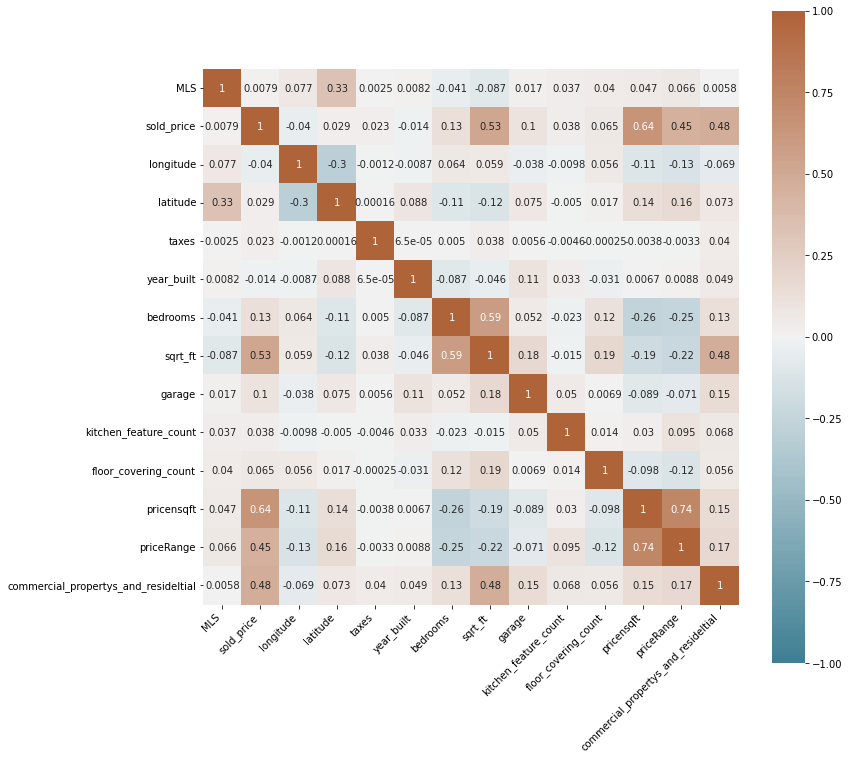

In [ ]:
plt.figure(figsize=(12, 12))
corr = data_cut.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220,30, n=400), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#KNN
X = data_cut

y = X['commercial_propertys_and_resideltial']
X = X[['latitude', 'longitude', 'year_built', 'pricensqft']]

X = X.to_numpy()
y = y.to_numpy()
X = X/X.max()

X_train, X_test, y_train, y_test = tt_split(X,y)

knnc = KNNClassifier()
knnc.fit(X_train,y_train)
y_hat_train_knnc = knnc.predict(X_train, 3)
print('Train accuracy: ')
print(accuracy(y_train, y_hat_train_knnc))

y_hat_test_knnc = knnc.predict(X_test, 3)
print('Test accuracy: ')
print(accuracy(y_test, y_hat_test_knnc))

Train accuracy: 
0.840960809102402
Test accuracy: 
0.7320525783619818


In [ ]:
# multi var linear regressin
class OurLinearRegression():
    
    def fit(self, X, y, eta=0.5e-1, epochs = 3e4, show_curve = False):
        epochs = int(epochs)
        N, D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat)
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            
    def predict(self, X):
        return X@self.W

def R2(Y, Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

0.3927984751175623

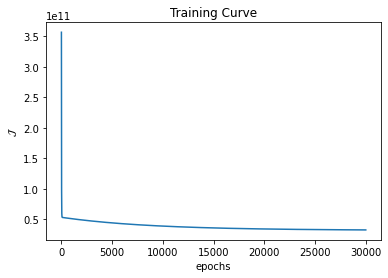

In [ ]:
X = data_cut

y = X['sold_price']
X = X[['latitude', 'longitude', 'year_built', 'pricensqft', 'commercial_propertys_and_resideltial']]
#X = X[[ 'price_range']]
X = X.to_numpy()
y = y.to_numpy()
X = X/X.max()

X_train, X_test, y_train, y_test = tt_split(X,y)
linR = OurLinearRegression()
linR.fit(X_train,y_train, show_curve=True)
y_hat_train_linR = linR.predict(X_train)

R2(y_train, y_hat_train_linR)

In [ ]:
y_hat_test_linR = linR.predict(X_test)

R2(y_test, y_hat_test_linR)

0.43360020566008495

In [ ]:
df=data_cut
data_cut

,MLS,sold_price,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,kitchen_feature_count,floor_covering_count,pricensqft,priceRange,commercial_propertys_and_resideltial
715,21700546,1040000.0,-110.909653,32.301099,12215075.00,1987,4,4,5729.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Ceramic Tile, Natural Stone",5,2,181.532554,2,1
1135,21829815,885000.0,-110.924210,32.309002,668059.00,2003,4,3,3650.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Natural Stone, Other: Travertine",11,3,242.465753,4,1
54,21521984,2037500.0,-110.918390,32.343176,32442.22,2003,3,5,9630.0,4.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",5,2,211.578401,3,1
1588,21428822,799000.0,-110.808671,32.264502,31277.10,1955,2,2,1774.0,0.0,"Refrigerator, Oven",1,"Carpet, Vinyl, Other",2,3,450.394589,4,1
27,21810373,2350000.0,-111.039845,32.451596,31275.00,2007,3,5,5391.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",6,Concrete,10,1,435.911705,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,21730800,1069000.0,-110.939051,32.243662,0.00,2018,3,3,3346.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",1,"Carpet, Natural Stone",9,2,319.485953,4,0
723,21624132,1048842.0,-110.938291,32.242845,0.00,2016,2,3,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1,"Carpet, Natural Stone",3,2,313.461447,4,0
1682,21811228,750000.0,-110.961048,32.409860,0.00,2018,4,3,3115.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",9,2,240.770465,4,0
4937,21708192,510000.0,-110.927929,32.231170,0.00,1949,4,3,2779.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Oven",1,"Carpet, Concrete",4,2,183.519252,2,0
